# EA 1, Aufgabe 4
Das gesuchte Programm `mergesort` findet sich unter

```~/materials/Aufgaben/EA1/mergesort```

Sie können es direkt von dort ausführen, zum Beispiel:

In [1]:
! ~/materials/Aufgaben/EA1/mergesort

No arguments have been passed. Default values are: 
1. Number of threads: 64.
2. Length of array to be sorted: 1000000.
Smallest execution time of 10 runs: 0.127913 


Sie können auch die Anzahl der Threads als erstes Element angeben: 

In [2]:
! ~/materials/Aufgaben/EA1/mergesort  1

No arguments for list length has been passed. Default values are: 
2. Length of array to be sorted: 1000000.
Smallest execution time of 10 runs: 0.101041 


Oder die Anzahl der Threads  und die Anzahl der Elemente, die sie Sortieren möchten: 

In [3]:
! ~/materials/Aufgaben/EA1/mergesort  1 1048576

Smallest execution time of 10 runs: 0.105545 


Die Ausführung wird dabei jeweils 10 mal wiederholt. 

Alternativ können sie das Programm (oder den C-Code) auch in ihr Homeverzeichnis kopieren und dort kompilieren und ausführen. Sie können dann das Programm auch verändern.  


**Tipp**:
    Sie können die Ausführung des Codes manuell machen oder in diesem Notebook mit Hilfe von Python automatisieren, z.B. mit:

In [4]:
import os

for n in [20, 21, 21]:
    string = " ! ~/materials/Aufgaben/EA1/mergesort  1 " + str(2 ** n)
    print(2 ** n)
    os.system(string)

1048576
Smallest execution time of 10 runs: 0.102915 
2097152
Smallest execution time of 10 runs: 0.219423 
2097152
Smallest execution time of 10 runs: 0.214967 


oder aber:

In [5]:
import subprocess

for n in [20, 21, 22]:
    cmd = " ~/materials/Aufgaben/EA1/mergesort  " + str(2) + " " + str(2 ** n)
    output = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]
    print("{} {}".format(n, (str(output).split()[6])))

20 0.058946
21 0.124127
22 0.260462


In [6]:
import matplotlib as mpl # imortiert das Hauptmodul
import matplotlib.pyplot as plt # importiert das unter-Modul, dass wir hier vor allem zum Plotten verwenden werden

# Musterlöung
Hier folgt nun, wie man die Aufgabe z.B. Lösen kann

## Weak Scaling 

In [7]:
times = []
threads = [1, 2, 4, 8, 16, 32]
size = [2**16,2**17,2**18,2**19, 2**20,2**21]
for n in zip(threads, size):
    cmd = "! ~/materials/Aufgaben/EA1/mergesort " + str(n[0]) + " " + str(n[1])
    output = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]
    print( output)
    times.append(float(str(output).split()[6]))
    print("{} {}".format(n, (str(output).split()[6])))

b'Smallest execution time of 10 runs: 0.005082 \n'
(1, 65536) 0.005082
b'Smallest execution time of 10 runs: 0.006452 \n'
(2, 131072) 0.006452
b'Smallest execution time of 10 runs: 0.008993 \n'
(4, 262144) 0.008993
b'Smallest execution time of 10 runs: 0.019768 \n'
(8, 524288) 0.019768
b'Smallest execution time of 10 runs: 0.044896 \n'
(16, 1048576) 0.044896
b'Smallest execution time of 10 runs: 0.117421 \n'
(32, 2097152) 0.117421


Text(0.5, 1.0, 'Weak scaling')

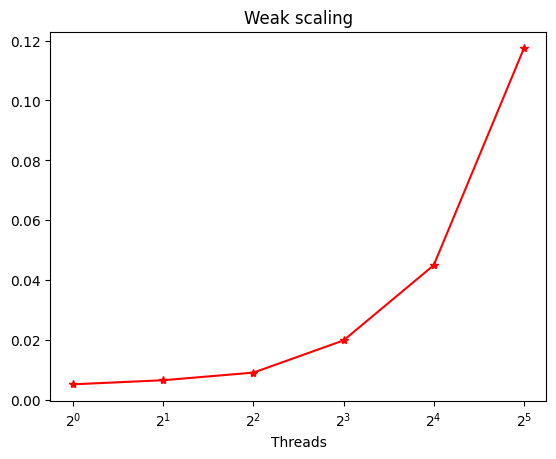

In [8]:
fig,ax = plt.subplots() # neuer Plot
ax.plot(threads,times, color= 'red',marker="*")
ax.set_xscale("log", base=2)
ax.set_xlabel("Threads")
ax.set_title("Weak scaling")
#x.set_ylim(0,0.05)
#x.set_yticks([0,0.02,0.04])

Text(0.5, 1.0, 'Weak scaling Speedup')

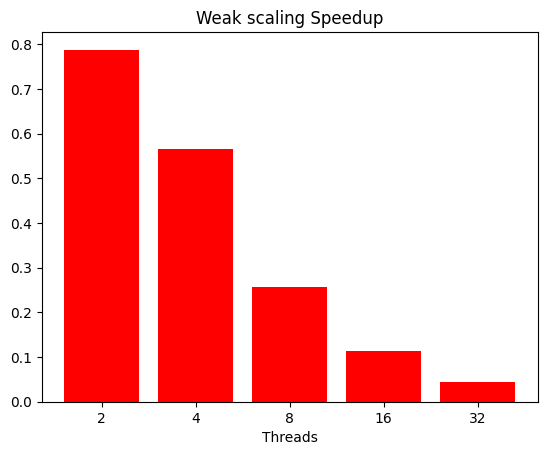

In [9]:
import numpy as np
timesnp= np.array(times)
speedup=times[0]/timesnp[1:]
fig,ax = plt.subplots() # neuer Plot
ax.bar(["2","4","8","16","32"],speedup, color= 'red')
ax.set_xlabel("Threads")
ax.set_title("Weak scaling Speedup")
#x.set_ylim(0,0.05)
#x.set_yticks([0,0.02,0.04])

Wie man hier sieht, wird das Programm immer langsamer, da der Overhead zur Parallelisierung immer größer wird. Gerade bei 16 Threads ist das Programm deutlich langsamer. Bei einer Idealen Skalierung würde die Laufzeit immer gleichbleiben und der Speedup bei 1 liegen, die die Problemgröße steigt. Das ist hier aber nicht der Fall! 

In [10]:
times = []
threads = [1, 2, 4, 8, 16, 32]

for n in threads:
    cmd = "! ~/materials/Aufgaben/EA1/mergesort " + str(n) + " " + str(2**16)
    output = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]
    print( output)
    times.append(float(str(output).split()[6]))
    print("{} {}".format(n, (str(output).split()[6])))

b'Smallest execution time of 10 runs: 0.005178 \n'
1 0.005178
b'Smallest execution time of 10 runs: 0.003127 \n'
2 0.003127
b'Smallest execution time of 10 runs: 0.002110 \n'
4 0.002110
b'Smallest execution time of 10 runs: 0.002206 \n'
8 0.002206
b'Smallest execution time of 10 runs: 0.003020 \n'
16 0.003020
b'Smallest execution time of 10 runs: 0.004085 \n'
32 0.004085


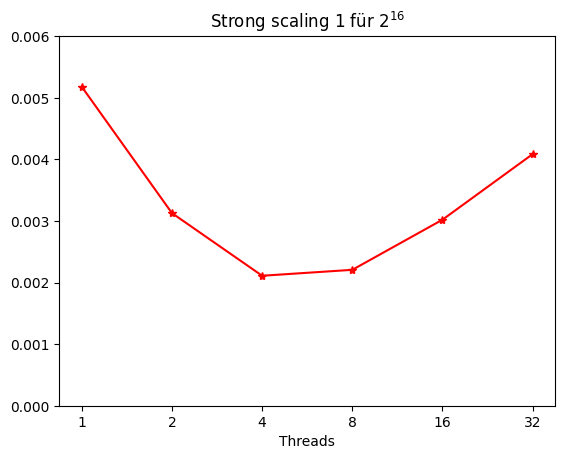

In [11]:
fig,ax = plt.subplots() # neuer Plot
ax.plot(threads,times, color= 'red',marker="*")
ax.set_xscale("log", base=2)
ax.set_xticks([1,2,4,8,16,32])
ax.set_xlabel("Threads")
ax.set_title(r"Strong scaling 1 für $2^{16}$")
ax.set_ylim(0,0.006)
ax.set_xticklabels({1:"1",2:"2",4:"4",8:"8",16:"16",32:"32"});
#

Text(0.5, 1.0, 'Strong scaling Speedup für n=$2^{16}$')

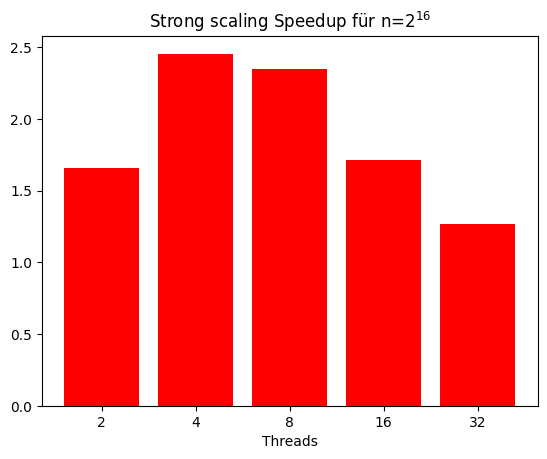

In [12]:
import numpy as np
timesnp= np.array(times)
speedup=times[0]/timesnp[1:]
fig,ax = plt.subplots() # neuer Plot
ax.bar(["2","4","8","16","32"],speedup, color= 'red')
ax.set_xlabel("Threads")
ax.set_title(r"Strong scaling Speedup für n=$2^{16}$")
#x.set_ylim(0,0.05)
#x.set_yticks([0,0.02,0.04])

In [13]:
times = []
threads = [1, 2, 4, 8, 16, 32]

for n in threads:
    cmd = "! ~/materials/Aufgaben/EA1/mergesort  " + str(n) + " " + str(2**20)
    output = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]
    print( output)
    times.append(float(str(output).split()[6]))
    print("{} {}".format(n, (str(output).split()[6])))

b'Smallest execution time of 10 runs: 0.101934 \n'
1 0.101934
b'Smallest execution time of 10 runs: 0.059031 \n'
2 0.059031
b'Smallest execution time of 10 runs: 0.043967 \n'
4 0.043967
b'Smallest execution time of 10 runs: 0.038743 \n'
8 0.038743
b'Smallest execution time of 10 runs: 0.043538 \n'
16 0.043538
b'Smallest execution time of 10 runs: 0.061801 \n'
32 0.061801


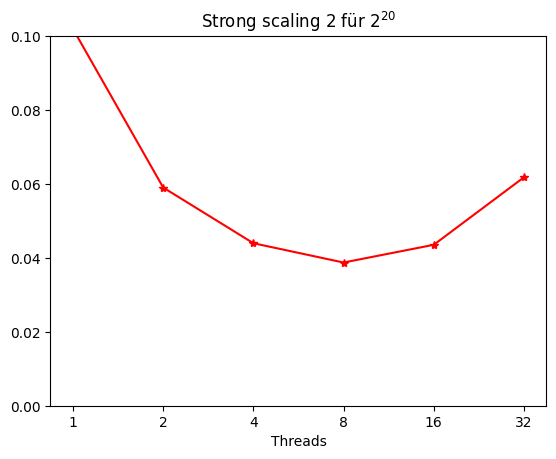

In [14]:
fig,ax = plt.subplots() # neuer Plot
ax.plot(threads,times, color= 'red',marker="*")
ax.set_xscale("log", base=2)
ax.set_xlabel("Threads")
ax.set_title(r"Strong scaling 2 für $2^{20}$")
ax.set_xticks([1,2,4,8,16,32])
ax.set_xticklabels({1:"1",2:"2",4:"4",8:"8",16:"16",32:"32"});
ax.set_ylim(0,0.1);
#x.set_yticks([0,0.02,0.04])

Text(0.5, 1.0, 'Strong scaling Speedup für n=$2^{20}$')

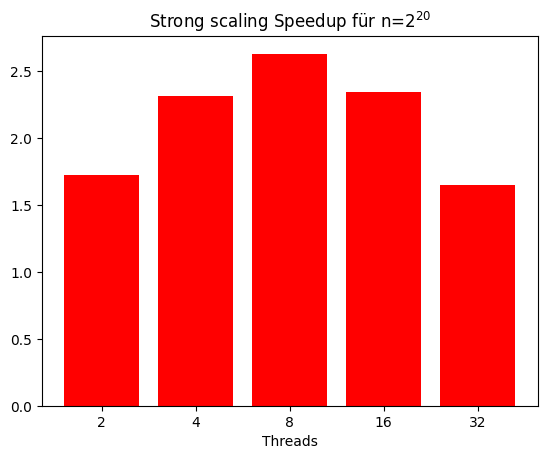

In [15]:
timesnp= np.array(times)
speedup=times[0]/timesnp[1:]
fig,ax = plt.subplots() # neuer Plot
ax.bar(["2","4","8","16","32"],speedup, color= 'red')
ax.set_xlabel("Threads")
ax.set_title(r"Strong scaling Speedup für n=$2^{20}$")
#x.set_ylim(0,0.05)
#x.set_yticks([0,0.02,0.04])

In den Strong-Scaling Experimenten sieht man sehr schön, dass sich bei diesem Programm eine Verwendung von mehr als 4 Threads bei der kleinen Problemgöße und für 8 Threads bei der großen Probmlemgröße kaum lohnt, weil dann das Programm langsamer wird. Hier ist der Overhead zur Parallelisierung deutlich zu hoch. 
